<a href="https://colab.research.google.com/github/syy12/deposit_term_prediction/blob/master/Data_Science_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A. Business Understanding

#### 1. Objective

> The goal is to find the best strategy for improvement for the next marketing campaign. Therefore, a Portuguese retail bank have been selected to analyse their last marketing campaign and determine the model that can help us to find conclusions so that financial institutions can play a more effective role in future marketing campaigns.

#### 2. Project Plan

> 2.1 The initial assessment of tools and techniques
>> The data mining tools that we are using is python and it support a lot of model and method to process and extract the useful data. For example, python able to remove the column which is unuseful and modify the data from alphabetical to numerical. The modification make the data process will be more convenient and easy to fit in the training model. 
#### 3. Business success criteria

>The success criteria is to predict whether the client is willing to subscribe a term deposit correctly or not.


In [ ]:
#using google colab, need to import from drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#for matrix math
import numpy as np

#for data preprocessing
import pandas as pd

#split data for training and testing
from sklearn.model_selection import train_test_split

#for plotting
import matplotlib.pyplot as plt   #graph
import seaborn as sns             #style


In [ ]:
#import and read dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bank.csv')

#display first five rows
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### B. Data Understanding
#### 1. Describe Data
> Portuguese retail bank had provided a dataset which has 17 columns and with 11162 entries. The data types of the dataset include 7 columns of integer type, 6 columns of string type and 4 columns of boolean type.




### Feature
####Integer type
1. "age" - age in years
2. "balance" - balance of the individual
3. "day" - last contact day of the week
4. "duration" - last contact duration, in seconds
5. "campaign" - number of contacts performed **during** this campaign and for this client
6. "pdays" - number of days that passed by after the client was last contacted from a previous campaign (value of 999 means the client was not previously contacted)
7. "previous" - number of contacts performed **before** this campaign and for this client

####Object type
1. "job" - type of job
2. "marital" - marital status
3. "education" - education background
4. "default" - having credit by default? 
5. "housing" - having housing loan?
6. "loan" - having personal loan?
7. "contact" - type of contact communication
8. "month" - last contact month of the year
9. "poutcome" - outcome of previous marketing campaign
10. "deposit" - subscribing a term deposit?

####Categorical Values
* Nominal Values: "job", "marital", "housing", "loan", "contact", "month", "poutcome", "deposit"
* Ordinal Values: "education"

####Numerical Values
* Interval Values: "age", "day", "duration", "campaign", "pdays", "previous"
* Ratio Values: "balance"

####Missing Values
As in further investigation, there is no duplicated rows and missing values found in this dataset. If there exists missing values, we will assigned them with the median, mean or mode.

####X variables
All of the columns in the dataset are X variables except for "deposit".

####Y variable
The Y variable will be "deposit" which identify whether the client is interested in subscribing for a term deposit.

In [ ]:
#check data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
#display total number of rows and column
data.shape

(11162, 17)

In [ ]:
#check any duplicated rows and missing values
print("Duplicated rows: " + str(data.duplicated().sum()))
print("Missing values: " + str(data.isnull().sum().sum()))

Duplicated rows: 0
Missing values: 0


In [ ]:
#describe numerical columns of the dataset
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
#display value from categorical columns
for col in data.select_dtypes(include='object').columns:
  print(col)
  print(data[col].unique())


job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


As stated above that the 'deposit' will be the Y-variable in this dataset, therefore the remaining from the categorical columns will be considered as the categorical features. There are a total of 9 categorical features where both 'job' and 'month' having the highest number of categorical values which is 12.
</br></br>
<table style='border:1px solid black;'>
  <tr style='font-size: 20px;'>
      <th style='text-align: center;border: 1px solid black;'>Categorical Feature</th>
      <th style='text-align: center;border: 1px solid black;'>Number of Category</th> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Job</td>
      <td style='text-align: center; border: 1px solid black;'>12</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Marital</td>
      <td style='text-align: center;border: 1px solid black;'>3</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Education</td> 
      <td style='text-align: center;border: 1px solid black;'>4</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Default</td> 
      <td style='text-align: center;border: 1px solid black;'>2</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Housing</td> 
      <td style='text-align: center;border: 1px solid black;'>2</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Loan</td> 
      <td style='text-align: center;border: 1px solid black;'>2</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Contact</td> 
      <td style='text-align: center;border: 1px solid black;'>3</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Month</td> 
      <td style='text-align: center;border: 1px solid black;'>12</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Poutcome</td> 
      <td style='text-align: center;border: 1px solid black;'>4</td> 
  </tr>
</table>

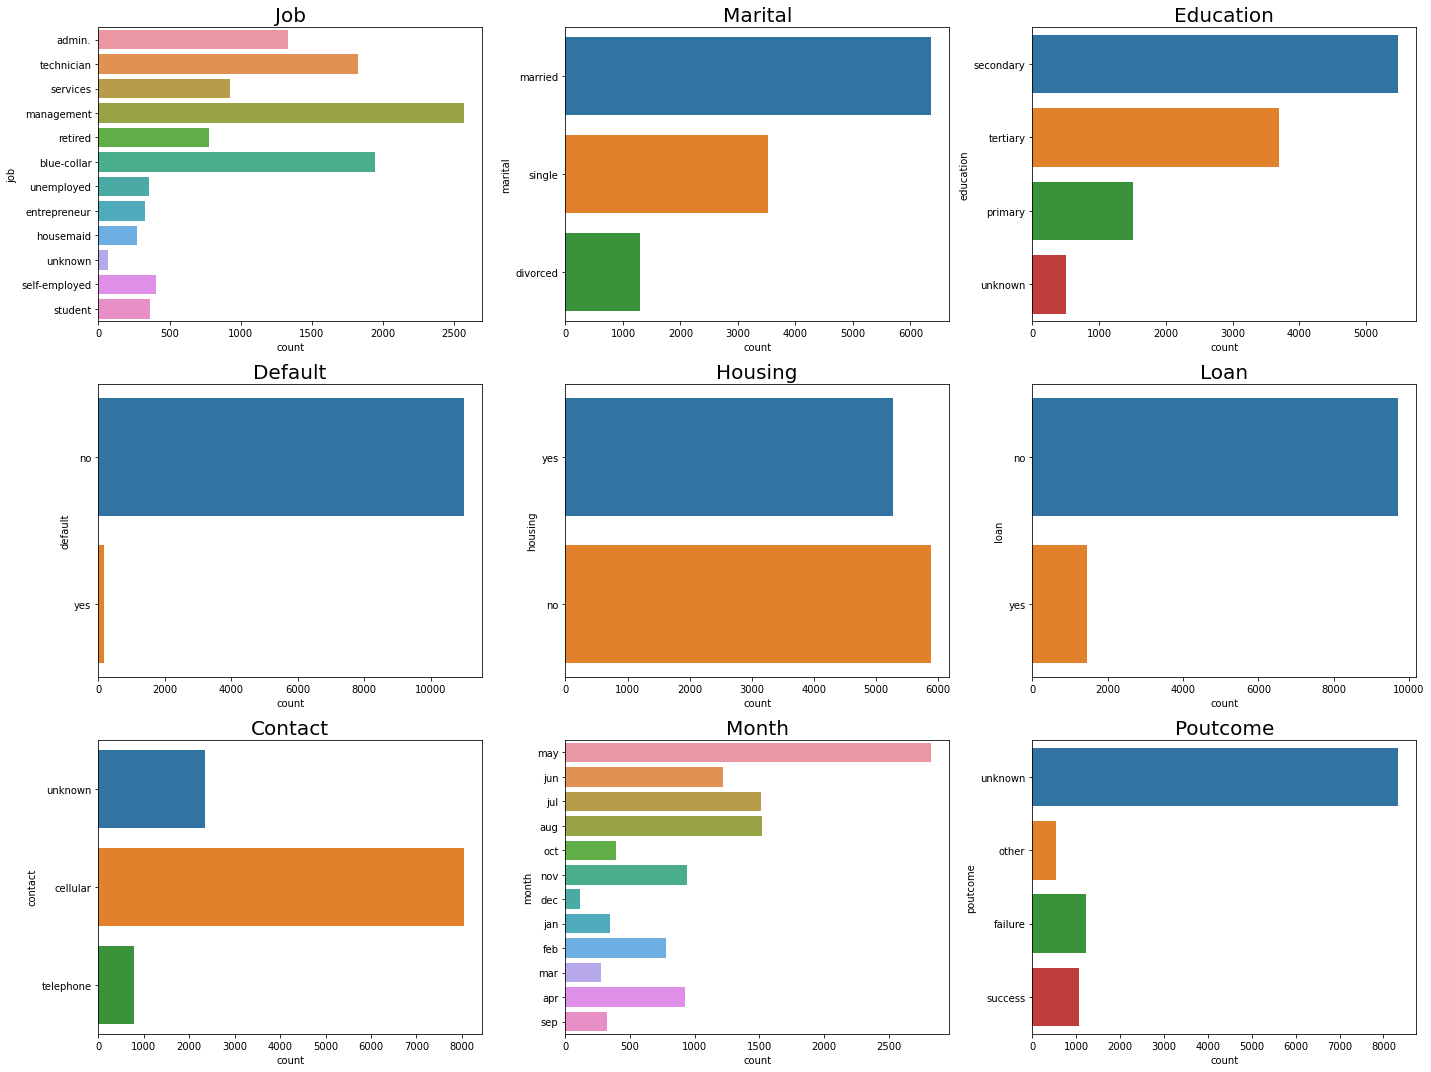

In [ ]:
#Explore the Categorical Features
#Visualise the categorical Features
plt.figure(figsize=(20,15), facecolor='white')

#plot graph by job
plt.subplot(331)
sns.countplot(y = data['job'])
plt.title("Job", fontsize=20)

#plot graph by marital
plt.subplot(332)
sns.countplot(y = data['marital'])
plt.title("Marital", fontsize=20)

#plot graph by education
plt.subplot(333)
sns.countplot(y = data['education'])
plt.title("Education", fontsize=20)

#plot graph by default
plt.subplot(334)
sns.countplot(y = data['default'])
plt.title("Default", fontsize=20)

#plot graph by housing
plt.subplot(335)
sns.countplot(y = data['housing'])
plt.title("Housing", fontsize=20)

#plot graph by loan
plt.subplot(336)
sns.countplot(y = data['loan'])
plt.title("Loan", fontsize=20)

#plot graph by contact
plt.subplot(337)
sns.countplot(y = data['contact'])
plt.title("Contact", fontsize=20)

#plot graph by month
plt.subplot(338)
sns.countplot(y = data['month'])
plt.title("Month", fontsize=20)

#plot graph by poutcome
plt.subplot(339)
sns.countplot(y = data['poutcome'])
plt.title("Poutcome", fontsize=20)

plt.tight_layout()
plt.show()

We can clearly see from the graphs, majority of the client which having a job related with management is more likely to be interested in subscribing for a term deposit while the housemaid are having the least number which are interested.

Besides, the marital status of the client which are married having a high record in this dataset and the client which already divorced having the least number.

Moreover, most of the client are having the secondary education background within this dataset.

Lastly, it is obvious that in the month of May there are many clients received calls from the bank and in December is the least.

In [ ]:
#Explore the Numerical Features
#Display the list of numerical variables
numeric_category=[]
for numeric in data.select_dtypes(include='int').columns:
  print(numeric)
  numeric_category.append(numeric)

print('\nThere are',len(numeric_category),'numerical category.\n')

#display first 5 rows of numerical variables data
data[numeric_category].head()

age
balance
day
duration
campaign
pdays
previous

There are 7 numerical category.



,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


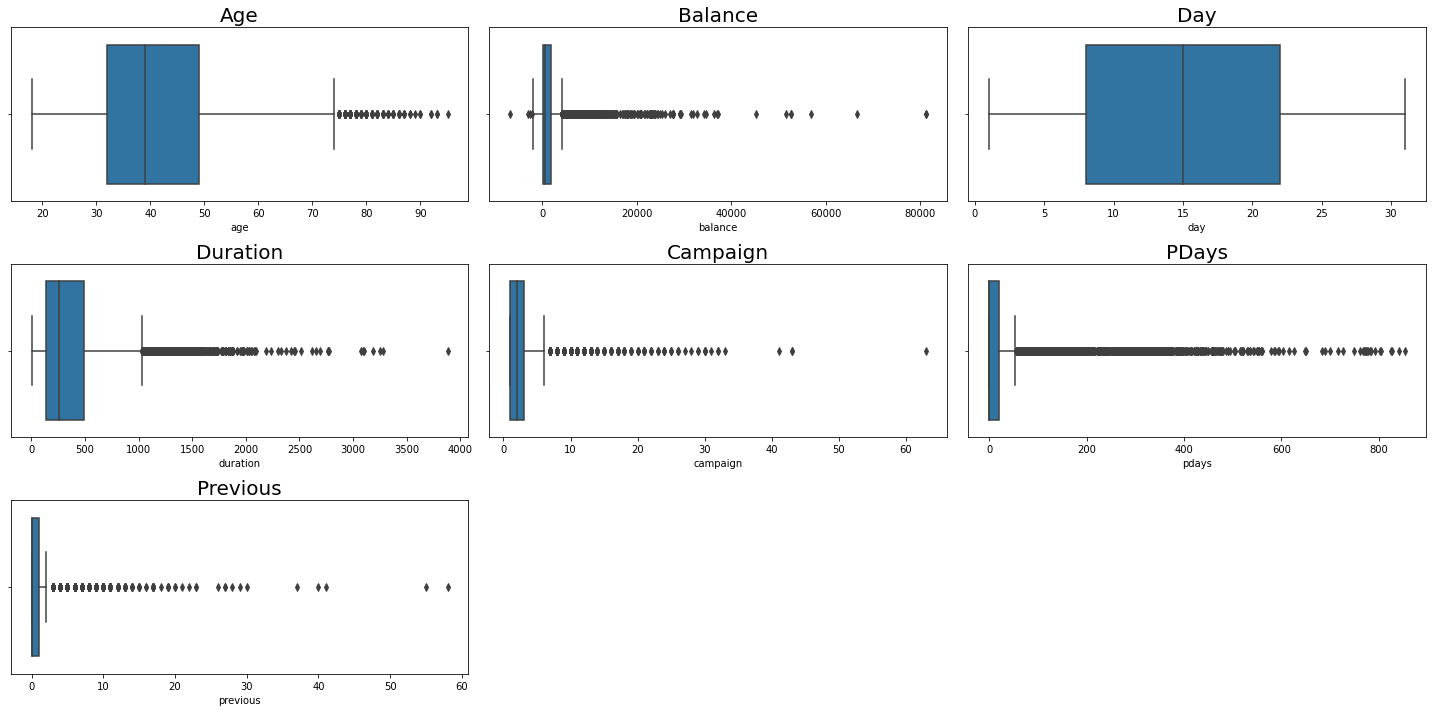

In [ ]:
#Visualise the all the numerical features using boxplot to find outliers
plt.figure(figsize=(20,10), facecolor='white')

#plot graph by age
plt.subplot(331)
sns.boxplot(data['age'])
plt.title("Age", fontsize=20)

#plot graph by balance
plt.subplot(332)
sns.boxplot(data['balance'])
plt.title("Balance", fontsize=20)

#plot graph by day
plt.subplot(333)
sns.boxplot(data['day'])
plt.title("Day", fontsize=20)

#plot graph by duration
plt.subplot(334)
sns.boxplot(data['duration'])
plt.title("Duration", fontsize=20)

#plot graph by campaign
plt.subplot(335)
sns.boxplot(data['campaign'])
plt.title("Campaign", fontsize=20)

#plot graph by pdays
plt.subplot(336)
sns.boxplot(data['pdays'])
plt.title("PDays", fontsize=20)

#plot graph by previous
plt.subplot(337)
sns.boxplot(data['previous'])
plt.title("Previous", fontsize=20)

plt.tight_layout()
plt.show()

From the result of the boxplots, we can observe that all of the numerical category contain many outliers except for 'days'.

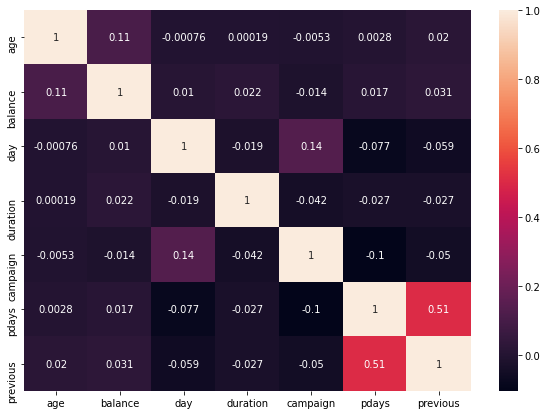

In [ ]:
#Explore the correlation between numerical features
#Check for correlation
cor_mat=data.corr()
fig = plt.figure(figsize=(10,7),facecolor='white')
sns.heatmap(cor_mat,annot=True)

deposit
no     5873
yes    5289
Name: deposit, dtype: int64



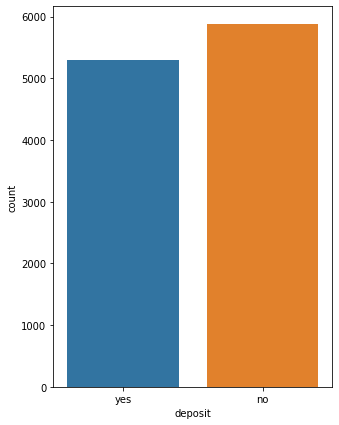

In [ ]:
#Show the number of 'deposit' for each of the category value
print(data['deposit'].groupby(data['deposit']).count())
print()
#visualise it using graph
plt.figure(figsize=(5,7),facecolor='white')
sns.countplot(data['deposit'])

### C. Data Preparation

clean data, handle outliers, data transformation

In [ ]:
#Clear data and Convert categorical variable to numeric
#"job", "marital", "housing", "loan", "contact", "month", "poutcome", "deposit","education","default"
data['deposit']=data['deposit'].map({'yes':1,'no':0,'unknown':-1})
data['default']=data['default'].map({'yes':1,'no':0,'unknown':-1})
data['education']=pd.Categorical(data['education']).codes
data['job']=pd.Categorical(data['job']).codes
data['marital']=pd.Categorical(data['marital']).codes
data['housing']=pd.Categorical(data['housing']).codes
data['loan']=pd.Categorical(data['loan']).codes
data['contact']=pd.Categorical(data['contact']).codes
data['month']=pd.Categorical(data['month']).codes
data['poutcome']=pd.Categorical(data['poutcome']).codes

#display first ten rows
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
5,42,4,2,2,0,0,1,1,2,5,8,562,2,-1,0,3,1
6,56,4,1,2,0,830,1,1,2,6,8,1201,1,-1,0,3,1
7,60,5,0,1,0,545,1,0,2,6,8,1030,1,-1,0,3,1
8,37,9,1,1,0,1,1,0,2,6,8,608,1,-1,0,3,1
9,28,7,2,1,0,5090,1,0,2,6,8,1297,3,-1,0,3,1


In [ ]:
data.groupby(['deposit','previous'],sort=True)['previous'].count()


deposit  previous
0        0           4940
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
1        0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

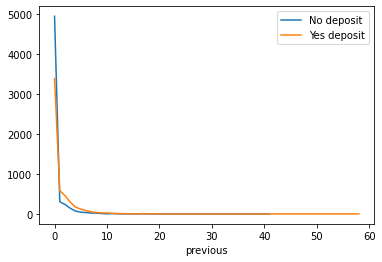

In [ ]:
df1 = data.loc[data.deposit==0,['deposit','previous']]
df1 = df1.rename(columns={'deposit':'No deposit'})
df2 = data.loc[data.deposit==1,['deposit','previous']]
df2 = df2.rename(columns={'deposit':'Yes deposit'})

p1 = df1.groupby(['previous']).count()
p2 = df2.groupby(['previous']).count()

#visualise it using graph
ax = p1.plot(kind='line')
p2.plot(ax=ax)

In [ ]:
data.groupby(['deposit','campaign'],sort=True)['campaign'].count()


deposit  campaign
0        1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
1        1           2561
         2          

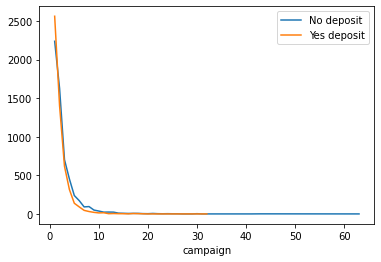

In [ ]:
df1 = data.loc[data.deposit==0,['deposit','campaign']]
df1 = df1.rename(columns={'deposit':'No deposit'})
df2 = data.loc[data.deposit==1,['deposit','campaign']]
df2 = df2.rename(columns={'deposit':'Yes deposit'})

p1 = df1.groupby(['campaign']).count()
p2 = df2.groupby(['campaign']).count()

#visualise it using graph
ax = p1.plot(kind='line')
p2.plot(ax=ax)

In [ ]:
data.groupby(['deposit','pdays'],sort=True)['pdays'].count()


deposit  pdays
0        -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
1         804        1
          805        1
          828        1
          842        1
          854        1
Name: pdays, Length: 732, dtype: int64

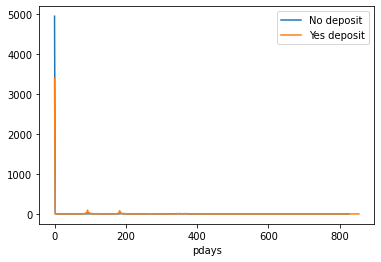

In [ ]:
df1 = data.loc[data.deposit==0,['deposit','pdays']]
df1 = df1.rename(columns={'deposit':'No deposit'})
df2 = data.loc[data.deposit==1,['deposit','pdays']]
df2 = df2.rename(columns={'deposit':'Yes deposit'})

p1 = df1.groupby(['pdays']).count()
p2 = df2.groupby(['pdays']).count()

#visualise it using graph
ax = p1.plot(kind='line')
p2.plot(ax=ax)

As the result for 'pdays' with number of -1 is around 4933, we decided to drop the column 'pdays'.

In [ ]:
#remove outliers where 'previous' is more than 30
data=data[data.previous<30]

#remove outliers where 'campaign' is more than 31
data=data[data.campaign<31]

#drop 'pdays'
data=data.drop(['pdays'],axis=1)
data.shape

(11148, 16)

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,0,3,1


### D. Modelling




### Split Data
The dataset will be split into training set and testing set. The training set is 80% of the dataset , and the testing set is 20% of the dataset.

In [ ]:
#Split data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
le = LabelEncoder()
X = data.drop(['deposit'],axis=1)
y = data['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

####Confusion Matrix

The main function for confusion matrix is to evaluate how well the model is performing when classifying the potential clients to subscribe term deposit in this case. There will be four terms in confusion matrix which are True Positive, False Positive, True Negative and False Negative.

For **True/False**, this means whether is correctly or incorrecly classified by the model. While for **Positive/Negative** is refer to the 'deposit' where to know that the client is subscribing for term deposit or not.

**True Positive:** The number of **correctly** classified for potential clients which is **willing** to subscribe a term deposit.

**False Positive:** The number of **incorrectly** classified for potential clients which is **willing** to subscribe a term deposit.

**True Negative:** The number of **correctly** classified for potential clients which is **not willing** to subscribe a term deposit.

**False Negative:** The number of **incorrectly** classified for potential clients which is **not willing** to subscribe a term deposit.

### Algorithm
There are 6 supervised learning algorithms have been selected to model the dataset in order to find the best modelling technique.

##### **Random Forest**

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_features=5, n_estimators=20)
#train model
RF.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
#test remaining model
y_pred = RF.predict(X_test)
print(confusion_matrix(y_test,y_pred.round()))
print(classification_report(y_test,y_pred.round()))


[[970 217]
 [167 876]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1187
           1       0.80      0.84      0.82      1043

    accuracy                           0.83      2230
   macro avg       0.83      0.83      0.83      2230
weighted avg       0.83      0.83      0.83      2230



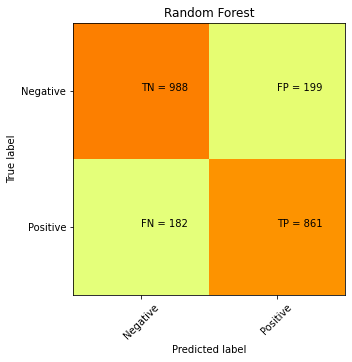

In [ ]:
cm=confusion_matrix(y_test,y_pred)
fig = plt.figure(figsize=(5,5),facecolor='white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap = plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Random Forest')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'],['FN', 'TP']]
for i in range(2):
  for j in range(2):
    plt.text(j, i, str(s[i][j] + " = " + str(cm[i][j])))
plt.show()

##### **Support Vector Classifier (SVC)**

In [ ]:
#SVC
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(confusion_matrix(y_test,y_pred.round()))
print(classification_report(y_test,y_pred.round()))

[[983 204]
 [442 601]]
              precision    recall  f1-score   support

           0       0.69      0.83      0.75      1187
           1       0.75      0.58      0.65      1043

    accuracy                           0.71      2230
   macro avg       0.72      0.70      0.70      2230
weighted avg       0.72      0.71      0.70      2230



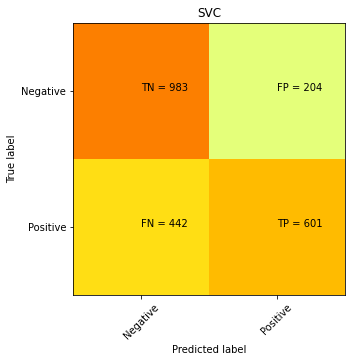

In [ ]:
cm=confusion_matrix(y_test,y_pred)
fig = plt.figure(figsize=(5,5),facecolor='white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap = plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('SVC')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'],['FN', 'TP']]
for i in range(2):
  for j in range(2):
    plt.text(j, i, str(s[i][j] + " = " + str(cm[i][j])))
plt.show()

##### **Naive Bayes**

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB


NB = GaussianNB()
NB.fit(X_train,y_train)
y_pred = NB.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[847 340]
 [226 817]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1187
           1       0.71      0.78      0.74      1043

    accuracy                           0.75      2230
   macro avg       0.75      0.75      0.75      2230
weighted avg       0.75      0.75      0.75      2230



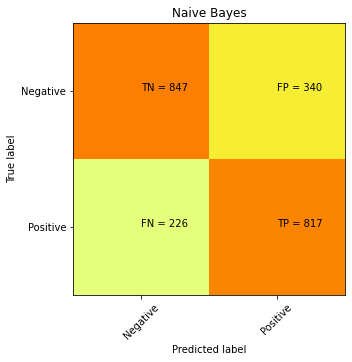

In [ ]:
cm=confusion_matrix(y_test,y_pred)
fig = plt.figure(figsize=(5,5),facecolor='white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap = plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Naive Bayes')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'],['FN', 'TP']]
for i in range(2):
  for j in range(2):
    plt.text(j, i, str(s[i][j] + " = " + str(cm[i][j])))
plt.show()

##### **K-nearest neighbors (KNN)**

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[902 285]
 [366 677]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1187
           1       0.70      0.65      0.68      1043

    accuracy                           0.71      2230
   macro avg       0.71      0.70      0.71      2230
weighted avg       0.71      0.71      0.71      2230



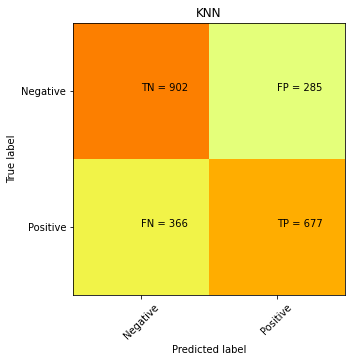

In [ ]:
cm=confusion_matrix(y_test,y_pred)
fig = plt.figure(figsize=(5,5),facecolor='white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap = plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('KNN')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'],['FN', 'TP']]
for i in range(2):
  for j in range(2):
    plt.text(j, i, str(s[i][j] + " = " + str(cm[i][j])))
plt.show()

##### **Logistic Regression**

In [ ]:
#Logstic Regression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
logistic.score(X_test, y_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[945 242]
 [256 787]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1187
           1       0.76      0.75      0.76      1043

    accuracy                           0.78      2230
   macro avg       0.78      0.78      0.78      2230
weighted avg       0.78      0.78      0.78      2230



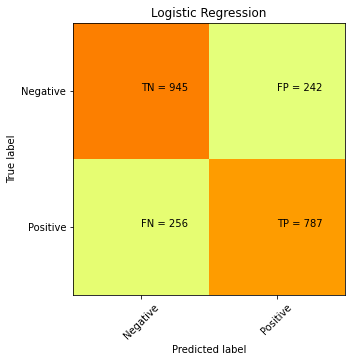

In [ ]:
cm=confusion_matrix(y_test,y_pred)
fig = plt.figure(figsize=(5,5),facecolor='white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap = plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'],['FN', 'TP']]
for i in range(2):
  for j in range(2):
    plt.text(j, i, str(s[i][j] + " = " + str(cm[i][j])))
plt.show()

##### **Decision Tree**

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[954 233]
 [260 783]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1187
           1       0.77      0.75      0.76      1043

    accuracy                           0.78      2230
   macro avg       0.78      0.78      0.78      2230
weighted avg       0.78      0.78      0.78      2230



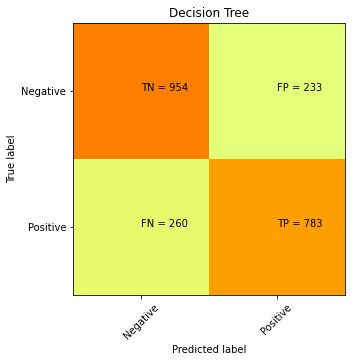

In [ ]:
cm=confusion_matrix(y_test,y_pred)
fig = plt.figure(figsize=(5,5),facecolor='white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap = plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Decision Tree')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'],['FN', 'TP']]
for i in range(2):
  for j in range(2):
    plt.text(j, i, str(s[i][j] + " = " + str(cm[i][j])))
plt.show()

### ROC Curve
Reciever Operating Characteristic (ROC) curve is often used as visualizations to measure the performance of binary classifiers. It is a graphical representation of true positive rates (TPR) and false positive rates (FPR) at various classification thresholds from 0 to 1. When the observations for each class are approximately equal the ROC curve should be used.

##### Predict Probability

In [ ]:
#prediction probablility
r_probs = [0 for _ in range(len(y_test))]
rf_probs = RF.predict_proba(X_test)
nb_probs = NB.predict_proba(X_test)
svc_probs = svc.predict_proba(X_test)
knn_probs = knn.predict_proba(X_test)
logistic_probs = logistic.predict(X_test)
dtc_probs = dtc.predict_proba(X_test)

#probabilities for the positive outcome is kept
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
svc_probs = svc_probs[:, 1]
knn_probs = knn_probs[:, 1]
dtc_probs = dtc_probs[:, 1]

##### Calculate the ROC curve and the AUROC socre. AUROC score is the area under the ROC curve.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

#calculate ROC curve
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
log_fpr, log_tpr, _ = roc_curve(y_test, logistic_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)

#calculate AUROC scores
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
log_auc = roc_auc_score(y_test, logistic_probs)
dtc_auc = roc_auc_score(y_test, dtc_probs)

##### Plot the ROC curve

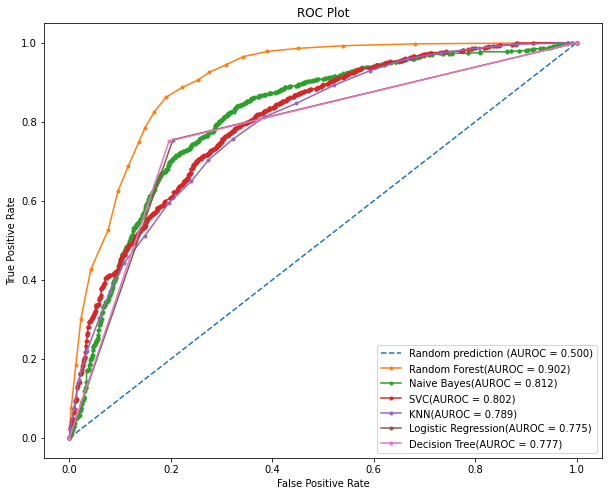

In [ ]:
#ROC plot
fig, ax = plt.subplots(figsize=(10,8),facecolor='white')
ax.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
ax.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
ax.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
ax.plot(svc_fpr, svc_tpr, marker='.', label='SVC (AUROC = %0.3f)' % svc_auc)
ax.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)
ax.plot(log_fpr, log_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % log_auc)
ax.plot(dtc_fpr, dtc_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dtc_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

### E. Evaluation





### Accuracy
Accuracy is simply a ratio of correctly predicted observations to total observation. Therefore, a high precision score does not directly indicate that the algorithm with high precision performs best, we also need to look at other parameters to evaluate the performace of the model.

<table style='border:1px solid black'>
  <tr style='font-size: 14px'>
      <th style='text-align: center;border: 1px solid black;'>Algorithms Used</th>
      <th style='text-align: center;border: 1px solid black;'>Accuracy Score</th> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Random Forest</td>
      <td style='text-align: left;border: 1px solid black;'>0.83</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Support Vector Classifier (SVC)</td>
      <td style='text-align: left;border: 1px solid black;'>0.72</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Naive Bayes</td> 
      <td style='text-align: left;border: 1px solid black;'>0.75</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>K-nearest Neighbors</td> 
      <td style='text-align: left;border: 1px solid black;'>0.71 </td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Logistic Regression</td> 
      <td style='text-align: left;border: 1px solid black;'>0.78</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Decision Tree Classifier</td> 
      <td style='text-align: left;border: 1px solid black;'>0.78</td> 
  </tr>
</table>

### Precision
Precision is the ratio of the correctly predicted positive observation to the total predicted positive observations. It is important to study the performance of the algorithm in predicting the labels.

<table style='border:1px solid black'>
  <tr style='font-size: 14px'>
      <th style='text-align: center;border: 1px solid black;'>Algorithms Used</th>
      <th style='text-align: center;border: 1px solid black;'>Precision Score</th> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Random Forest</td>
      <td style='text-align: left;border: 1px solid black;'>0.80</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Support Vector Classifier (SVC)</td>
      <td style='text-align: left;border: 1px solid black;'>0.75</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Naive Bayes</td> 
      <td style='text-align: left;border: 1px solid black;'>0.71</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>K-nearest Neighbors</td> 
      <td style='text-align: left;border: 1px solid black;'>0.70 </td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Logistic Regression</td> 
      <td style='text-align: left;border: 1px solid black;'>0.76</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Decision Tree Classifier</td> 
      <td style='text-align: left;border: 1px solid black;'>0.77</td> 
  </tr>
</table>

### Recall
Recall is the ratio of correctly predicted the positive observation to all the observations in actual class.

<table style='border:1px solid black'>
  <tr style='font-size: 14px'>
      <th style='text-align: center;border: 1px solid black;'>Algorithms Used</th>
      <th style='text-align: center;border: 1px solid black;'>Recall Score</th> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Random Forest</td>
      <td style='text-align: left;border: 1px solid black;'>0.84</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Support Vector Classifier (SVC)</td>
      <td style='text-align: left;border: 1px solid black;'>0.58</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Naive Bayes</td> 
      <td style='text-align: left;border: 1px solid black;'>0.78</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>K-nearest Neighbors</td> 
      <td style='text-align: left;border: 1px solid black;'>0.65 </td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Logistic Regression</td> 
      <td style='text-align: left;border: 1px solid black;'>0.75</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Decision Tree Classifier</td> 
      <td style='text-align: left;border: 1px solid black;'>0.75</td> 
  </tr>
</table>

### F1 Score
F1 score are the weighted average of precision and recall. Thus, this score takes into account both false positives and false negatives. When have an uneven class distribution, F1 score is more useful than accuracy.

<table style='border:1px solid black'>
  <tr style='font-size: 14px'>
      <th style='text-align: center;border: 1px solid black;'>Algorithms Used</th>
      <th style='text-align: center;border: 1px solid black;'>F1 Score</th> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Random Forest</td>
      <td style='text-align: left;border: 1px solid black;'>0.82</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Support Vector Classifier (SVC)</td>
      <td style='text-align: left;border: 1px solid black;'>0.65</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Naive Bayes</td> 
      <td style='text-align: left;border: 1px solid black;'>0.74</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>K-nearest Neighbors</td> 
      <td style='text-align: left;border: 1px solid black;'>0.68 </td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Logistic Regression</td> 
      <td style='text-align: left;border: 1px solid black;'>0.76 </td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Decision Tree Classifier</td> 
      <td style='text-align: left;border: 1px solid black;'>0.76</td> 
  </tr>
</table>

###F. Deployment

Generally, there are several ways to deploy a model. As this model is to predict the potential client which going to subscribe a term deposit for the next marketing campaign, the main requirement for the deployment is having large amount of client data. By having these data, the bank is able to have a more accurate prediction to get their potential customer which able to bring more revenue to the company.

For the deployment tools, Jenkins is recommended. This is because when a model is going to deploy, the version control of the code must be done and checked in order to build and test. For version control, GitHub would be one of the choice and most importantly, GitHub is work with Jenkins. Thus, Jenkins will be the best choice for the company to deploy the model quickly and efficiently that brings benefit from its core functionality in future.


###G. Conclusion


As Random Forest have a accuracy of 0.83, precision of 0.80, recall of 0.84 and F1 socre of 0.82, which have the highest accuracy, precision, recall and F1 score compared to others. Besides, ROC curve will tell us how good the algorithms is for distinguishing the given classes in terms of the predicted probability,therefore in our ROC curve the Random forest have the higest AUROC compared to others which have 0.902, it is consider as very good. Based on the result, the Random Forest have been choosen to implement in order can play a more effective role in future marketing campaigns.

##### **Advantages and Weaknesses/ Limitations of Algorithms Used**

##### Random Forest 
*  Random Forest is one of the most accurate learning algorithms available. The advantages of Random Forest is it will produces a highly accurate classifier for many datasets.Besides, it runs efficiently on large databases and its produces an internal unbiased estimated of the generalization error as forest construction progress.

* The weakness of Random Forest is it is not do a good job for regression problem as it does not gives precise continuous nature prediction. Besides, we have very little control on what the random forest does, we only can try different parameters and random seeds.


##### Support Vector Classifier (SVC)
* The advantages of SVC is stable because it does not have greatly affect when the data have small changes. Moreover, SVC can hanlde the non-linear data efficiently by using kernel trick.

* The limitations of SVC is not suitable for large datasets because it will cause take longer training time.


##### Naive Bayes
* The advantages of Naive Bayes is does not require as much training data and it is simple and easy to implement. Besides, Naive Bayes can be used to make real-time predictions because it is fast.   

* The limitation of Naive Bayes is that it assumes indepent predictive characteristics. Naive Bayes will implicitly assumes that all the attributes are independent to each other. 

##### K-Nearest Neighbors
*   The advantages of KNN is it have high accuracy so that no need to compore with better-supervised learning model. Although have new data added seamlessly also will not impact the accuracy of the algorithm. Besides, it no need to have assumptions about the data.

*   The limitation of KNN is it may be slow in the prediction stage if the dataset is large and it also need high memory to store all of the training data. Besides, it is sentivite to the scale of the data and irrelevant features. 



##### Logistic Regression
* The advantages of Logistic Regression is very efficient because it does not require too many computational resources, and does not require input features to be scaled. Besides, Logistic Regression is easy to implement and very efficient to train.

*   The limitation of Logistic Regression is not easy to capture complex relationships. Moreover, Logistic Regression need a large dataset and sufficient training examples for all categories it needs to identify.

##### Decision Tree Classifier

*   The advantages of Decision Tree Classifier is require less effort for data preparation during preprocessing compared to others algorithms. Decision Tree Classifier are not require standardization of the data and not require to extend the data. Besides, it does not have significantly affect the decision tree construction process when the data have missing values.

*   The limitations of Decision Tree Classifier is it will be more complexity in calculation compared to other algorithms. Besides, it will have large change in the struture when there are only have small change in the data therefore it will causing instability.

